In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import graphviz
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# 1. 데이터 현황

In [ ]:
df_car = pd.read_csv("/home/piai/test/Data2/Car.csv")
df_car.head(40)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
5,Hyundai EON LPG Era Plus Option,Hyderabad,3602.46,2012,75000,LPG,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
6,Nissan Micra Diesel XV,Jaipur,5365.36,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,26826.80,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh
8,Volkswagen Vento Diesel Comfortline,Pune,7971.39,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
9,Tata Indica Vista Quadrajet LS,Chennai,2989.27,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN


In [ ]:
df_car.shape

(7253, 13)

# 2. 데이터 정제

### 변수 삭제

In [ ]:
# df_car.drop('Location', axis=1, inplace= True) # 가격과 관계없음 (일반 상식)
df_car.drop('New_Price', axis=1, inplace= True) # 결측치 너무 많음 (6000개)
df_car.drop('Engine', axis=1, inplace=True) # 상관관계 분석 결과 power와 다중 공선성
df_car.drop('Owner_Type', axis=1, inplace = True) # anova 분석 결과 Price와 관계 X

In [ ]:
df_car.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Mileage                 2
Power                  46
Seats                  53
dtype: int64

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 566.8+ KB


### 정수형 변환

#### 단위 삭제

In [ ]:
df_car[['Mileage', 'Mileage_unit']] = df_car['Mileage'].str.split(expand = True)
df_car[['Power', 'Power_unit']] = df_car['Power'].str.split(expand = True)
df_car = df_car[df_car['Power'] != 'null']

df_car['Mileage'] = df_car['Mileage'].astype('float64')
df_car['Power'] = df_car['Power'].astype('float64')

df_car = df_car.drop(['Mileage_unit', 'Power_unit'], axis = 1)

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 0 to 7252
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7124 non-null   object 
 1   Location           7124 non-null   object 
 2   Price              6093 non-null   float64
 3   Year               7124 non-null   int64  
 4   Kilometers_Driven  7124 non-null   int64  
 5   Fuel_Type          7124 non-null   object 
 6   Transmission       7124 non-null   object 
 7   Mileage            7122 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7075 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 612.2+ KB


### 결측치 대체

#### seats

In [ ]:
most_frequent= df_car['Seats'].mode()[0]  # 최빈값 계산
df_car['Seats'].fillna(most_frequent, inplace=True)
df_car['Seats'] = df_car['Seats'].astype('int64')

In [ ]:
df_car.isnull().sum()

Name                    0
Location                0
Price                1031
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Mileage                 2
Power                  46
Seats                   0
dtype: int64

#### price, mileage, power
-> 변수 값간 편차가 큼 따라서 결측치를 대체하기에 리스크 high

In [ ]:
df_car = df_car.dropna()

### 이상치 제거

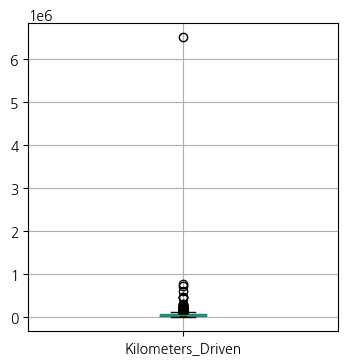

In [ ]:
df_car[['Kilometers_Driven']].boxplot(figsize=(4,4))
plt.show()

In [ ]:
# df_car[df_car['Kilometers_Driven'] > 6000000]

In [ ]:
df_car = df_car[df_car['Kilometers_Driven'] < 6000000]

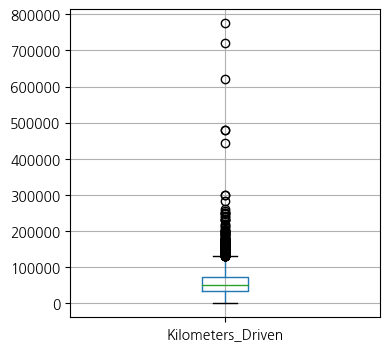

In [ ]:
df_car[['Kilometers_Driven']].boxplot(figsize=(4,4))
plt.show()

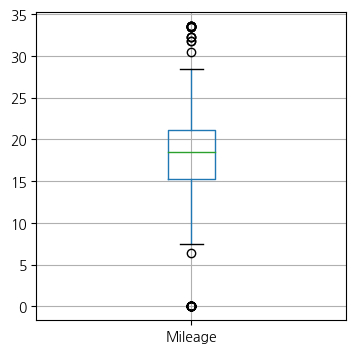

In [ ]:
df_car[['Mileage']].boxplot(figsize=(4,4))
plt.show()

In [ ]:
len(df_car[df_car['Mileage'] < 5])

29

In [ ]:
df_car = df_car[df_car['Mileage'] > 0]

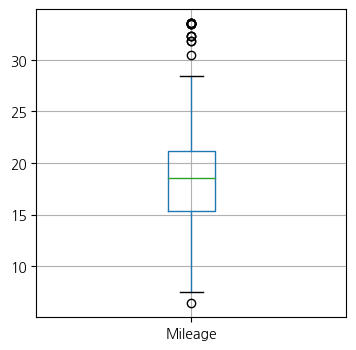

In [ ]:
df_car[['Mileage']].boxplot(figsize=(4,4))
plt.show()

### 범주형 변수 구간 지정 (Name, Location)

In [ ]:
df_car['Brand'] = df_car['Name'].apply(lambda x: x.split()[0])
df_car

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Power,Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,26.60,58.16,5,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,19.67,126.20,5,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,18.20,88.70,5,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,20.77,88.76,7,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,15.20,140.80,5,Audi
...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,27.28,69.00,5,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,17.00,121.36,5,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,16.00,160.00,5,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,24.30,88.50,5,Maruti


In [ ]:
# brand_price = df_car.groupby('Brand')['Price'].mean().round(1).sort_values(ascending=False)
# brand_price = brand_price.dropna()
# # df = pd.DataFrame(brand_price)
# df

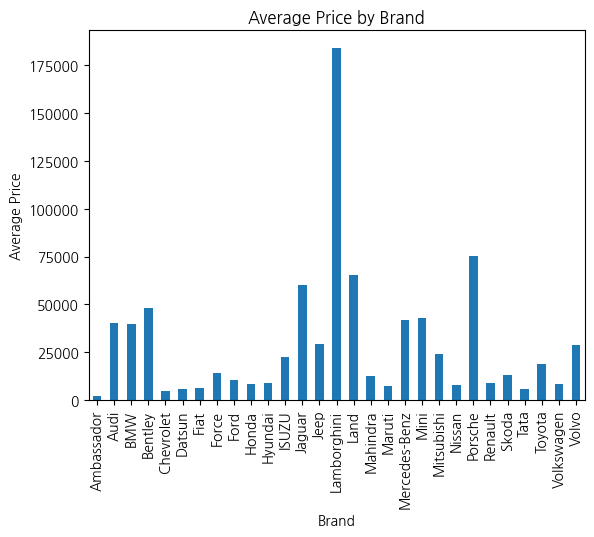

In [ ]:
brand_avg_price = df_car.groupby('Brand')['Price'].mean()
brand_avg_price.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.show()

In [ ]:
df_car

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Power,Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,26.60,58.16,5,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,19.67,126.20,5,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,18.20,88.70,5,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,20.77,88.76,7,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,15.20,140.80,5,Audi
...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,27.28,69.00,5,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,17.00,121.36,5,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,16.00,160.00,5,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,24.30,88.50,5,Maruti


In [ ]:
# Price 평균값 기준

df_car['Brand'] = df_car['Brand'].replace({
    'Ambassador': 'low',
    'Datsun': 'low',
    'Fiat': 'low',
    'Maruti': 'low',
    'Nissan': 'low',
    'Renault': 'low',
    'Smart': 'low',
    'Tata': 'low',
    'Chevrolet': 'low',
    'Force': 'low',
    'Ford': 'low',
    'Honda': 'low',
    'Hyundai': 'low',
    'ISUZU': 'medium',
    'Toyota': 'medium',
    'Jeep': 'medium',
    'Mahindra': 'low',
    'Mini': 'medium',
    'Mitsubishi': 'medium',
    'Skoda': 'low',
    'Volkswagen': 'low',
    'Volvo': 'medium',
    'Audi': 'high',
    'BMW': 'high',
    'Bentley': 'high',
    'Jaguar': 'high',
    'Lamborghini': 'high',
    'Land': 'high',
    'Mercedes-Benz': 'high',
    'Porsche': 'high'
})

In [ ]:
# 인구 기준

df_car['Location'] = df_car['Location'].replace({
    'Kochi': 'Suburban',
    'Mumbai' : 'Urban',
    'Delhi' : 'Urban',
    'Bangalore' :'Urban',
    'Ahmedabad': 'Urban',
    'Kolkata' : 'Urban',
    'Hyderabad' :'Urban',
    'Chennai' : 'Suburban',
    'Coimbatore': 'Suburban',
    'Pune' : 'Suburban',
    'Jaipur' :'Suburban'
})

In [ ]:
df_car = df_car.drop('Name', axis=1, inplace= False)

In [ ]:
a = df_car['Brand'].value_counts()

print(a)

low       4583
high       930
medium     512
Name: Brand, dtype: int64


### 범주형 변수 더미 변환

In [ ]:
df_car_dummy = pd.get_dummies(df_car)
df_car_dummy.columns

Index(['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats',
       'Location_Suburban', 'Location_Urban', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Brand_high',
       'Brand_low', 'Brand_medium'],
      dtype='object')

In [ ]:
df_car_dummy = df_car_dummy.drop(columns = ['Transmission_Manual']) # 다중공선성
df_car_dummy = df_car_dummy.drop(columns = ['Location_Suburban']) # 다중공선성

In [ ]:
df_car_x = df_car_dummy.drop('Price', axis=1, inplace= False)
correlation_matrix = df_car_x.corr()

# 상관계수 행렬을 높은 상관계수 순으로 정렬
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1.0]  # 대각선 상관계수는 1이므로 제외

# 결과 출력
print(sorted_correlations)

Brand_high              Power                     0.717595
Power                   Brand_high                0.717595
Transmission_Automatic  Brand_high                0.653166
Brand_high              Transmission_Automatic    0.653166
Transmission_Automatic  Power                     0.638757
                                                    ...   
Brand_low               Power                    -0.689752
                        Brand_high               -0.761661
Brand_high              Brand_low                -0.761661
Fuel_Type_Diesel        Fuel_Type_Petrol         -0.978181
Fuel_Type_Petrol        Fuel_Type_Diesel         -0.978181
Length: 182, dtype: float64


### 다중공선성 확인

In [ ]:
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_car_x.drop(['Fuel_Type_Petrol', 'Brand_medium'], axis =1, inplace= True) # VIF 가장 높은 변수 삭제
df_car_x

,Year,Kilometers_Driven,Mileage,Power,Seats,Location_Urban,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Transmission_Automatic,Brand_high,Brand_low
0,2010,72000,26.60,58.16,5,1,1,0,0,0,0,1
1,2015,41000,19.67,126.20,5,0,0,1,0,0,0,1
2,2011,46000,18.20,88.70,5,0,0,0,0,0,0,1
3,2012,87000,20.77,88.76,7,0,0,1,0,0,0,1
4,2013,40670,15.20,140.80,5,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7228,2016,41413,27.28,69.00,5,0,0,1,0,0,0,1
7231,2017,39015,17.00,121.36,5,0,0,0,0,0,0,1
7232,2018,6000,16.00,160.00,5,1,0,0,0,0,0,0
7235,2017,21380,24.30,88.50,5,0,0,1,0,0,0,1


In [ ]:
df_car_x_const = add_constant(df_car_x)
df_car_x_const

df_vif = pd.DataFrame()
df_vif['variable'] = df_car_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_car_x_const.values, i) for i in range(df_car_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
9,Fuel_Type_LPG,1.00
6,Location_Urban,1.04
7,Fuel_Type_CNG,1.08
2,Kilometers_Driven,1.51
1,Year,1.60
5,Seats,1.78
8,Fuel_Type_Diesel,1.88
10,Transmission_Automatic,2.06
3,Mileage,2.87
12,Brand_low,3.08


* VIF 가장 높은 변수 삭제(Fuel_Type_Petrol,Brand_medium)

  -> 삭제 후 모든 변수 VIF < 10

### 회귀분석

In [ ]:
reg_model = smf.ols(formula = "Price ~ Kilometers_Driven + Location_Urban + Year +Seats + Transmission_Automatic + Mileage + Power + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_LPG +Brand_high + Brand_low", data = df_car_dummy)
reg_result= reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1261.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:08:48   Log-Likelihood:                -63677.
No. Observations:                6025   AIC:                         1.274e+05
Df Residuals:                    6012   BIC:                         1.275e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.00

* 신뢰도 90%, Price에 대해 유의미하지 않은 변수 삭제 (Seats)

In [ ]:
reg_model = smf.ols(formula = "Price ~ Kilometers_Driven + Year+ Location_Urban  + Transmission_Automatic + Mileage + Power + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_LPG +Brand_high + Brand_low", data = df_car_dummy)
reg_result= reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1375.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:08:49   Log-Likelihood:                -63677.
No. Observations:                6025   AIC:                         1.274e+05
Df Residuals:                    6013   BIC:                         1.275e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.98

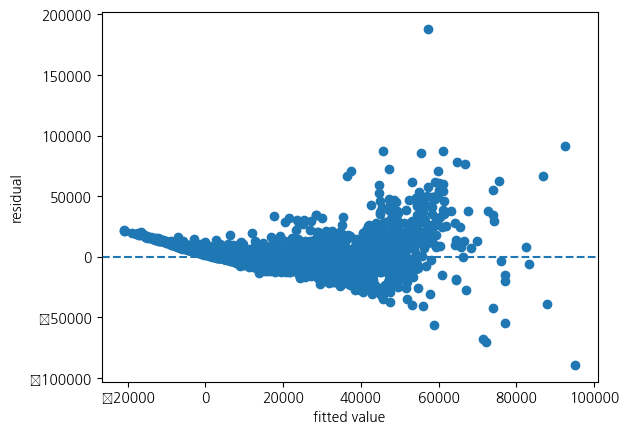

In [ ]:
# 잔차 산점도: X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

plt.show()

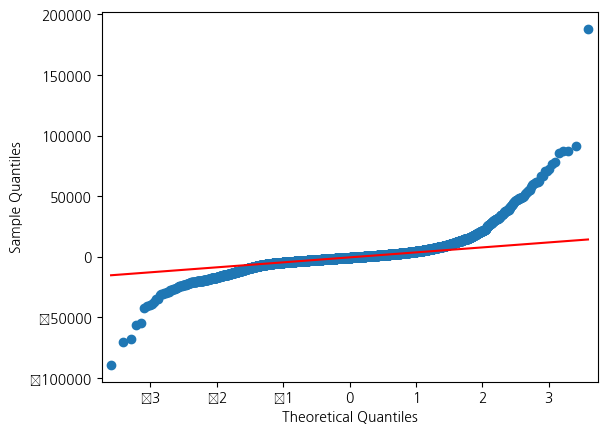

In [ ]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line,
qqplot(reg_result.resid, line = "q")

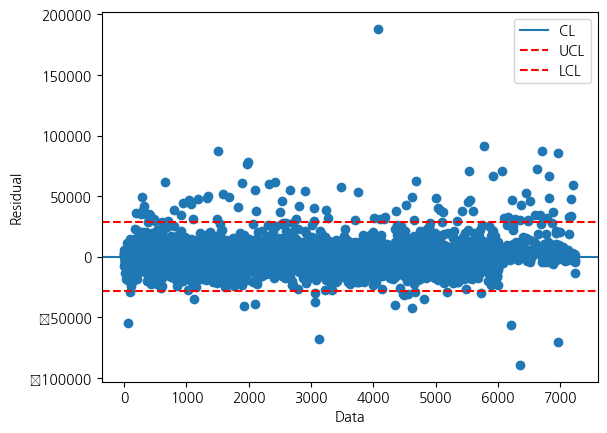

In [ ]:
# 잔차의 독립성 확인
plt.scatter(df_car_x.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

plt.show()

#### 변수 삭제 후 test, train split

In [ ]:
df_car_y = df_car_dummy['Price']
df_car_x = df_car_dummy.drop(["Price", "Seats", 'Fuel_Type_Petrol', 'Brand_medium'], axis=1, inplace=False)
print(df_car_x.columns)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_car_x, df_car_y, test_size = 0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Location_Urban',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Transmission_Automatic', 'Brand_high', 'Brand_low'],
      dtype='object')
train data X size : (4217, 11)
train data Y size : (4217,)
test data X size : (1808, 11)
test data Y size : (1808,)


## 다중 선형 회귀 분석

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

### RIDGE

In [ ]:
ridge = Ridge(alpha=4)
ridge.fit(df_train_x, df_train_y)

train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("Score on training set: {:.3f}".format(r2_score(df_train_y, train_pred)))
print("Score on test set: {:.3f}".format(r2_score(df_test_y, test_pred)))

Score on training set: 0.711
Score on test set: 0.728


In [ ]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
Year,1513.920895
Kilometers_Driven,-0.026256
Mileage,-158.495994
Power,149.500766
Location_Urban,-734.402429
Fuel_Type_CNG,2281.264214
Fuel_Type_Diesel,2423.671993
Fuel_Type_LPG,3972.249699
Transmission_Automatic,885.023549
Brand_high,11127.313968


/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


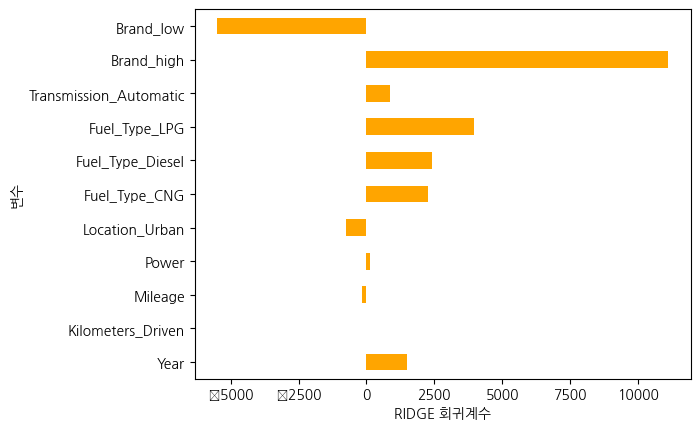

In [ ]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = "Coef", legend = False, color = 'orange')
plt.xlabel("RIDGE 회귀계수")
plt.ylabel("변수")
plt.show()

### Elastic

In [ ]:
elastic = ElasticNet(alpha=1)
elastic.fit(df_train_x, df_train_y)

train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("Score on training set: {:.3f}".format(r2_score(df_train_y, train_pred)))
print("Score on test set: {:.3f}".format(r2_score(df_test_y, test_pred)))

Score on training set: 0.675
Score on test set: 0.699


In [ ]:
# 회귀계수 확인
df_ela_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_ela_coef

,Coef
Year,1405.716388
Kilometers_Driven,-0.029246
Mileage,-13.404996
Power,224.104766
Location_Urban,-251.747434
Fuel_Type_CNG,38.086246
Fuel_Type_Diesel,994.156221
Fuel_Type_LPG,22.874563
Transmission_Automatic,846.143592
Brand_high,1585.223542


/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


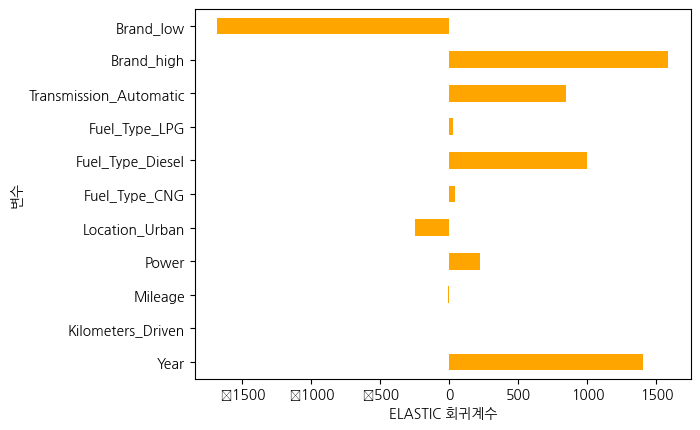

In [ ]:
# 회귀계수 그래프
df_ela_coef.plot.barh(y = "Coef", legend = False, color = 'orange')
plt.xlabel("ELASTIC 회귀계수")
plt.ylabel("변수")
plt.show()

### LASSO

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(df_train_x, df_train_y)

train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("Score on training set: {:.3f}".format(r2_score(df_train_y, train_pred)))
print("Score on test set: {:.3f}".format(r2_score(df_test_y, test_pred)))

Score on training set: 0.711
Score on test set: 0.728


In [ ]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
Year,1517.160705
Kilometers_Driven,-0.026113
Mileage,-162.065802
Power,148.925787
Location_Urban,-735.079296
Fuel_Type_CNG,2407.279283
Fuel_Type_Diesel,2431.330391
Fuel_Type_LPG,5424.918042
Transmission_Automatic,836.559834
Brand_high,11327.515495


/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


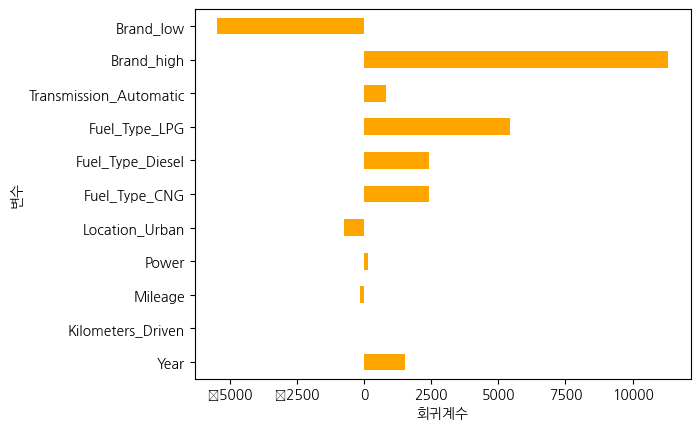

In [ ]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = "Coef", legend = False, color = 'orange')
plt.xlabel("회귀계수")
plt.ylabel("변수")
plt.show()

## Tree

### Decision Tree

In [ ]:
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 104 Page
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.613
1,2,0.964,0.746
2,3,0.940,0.806
3,4,0.927,0.823
4,5,0.911,0.828
5,6,0.901,0.846
6,7,0.892,0.835
7,8,0.885,0.835
8,9,0.881,0.841
9,10,0.875,0.841


In [ ]:
train_score = []; test_score = []

# min_samples_split: 분리할 수 있는 노드의 최소자료 수
para_split = [n_split * 4 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_leaf=20
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,8,0.832,0.830
1,12,0.832,0.830
2,16,0.832,0.830
3,20,0.832,0.830
4,24,0.832,0.830
5,28,0.832,0.830
6,32,0.832,0.830
7,36,0.832,0.830
8,40,0.832,0.830
9,44,0.831,0.832


In [ ]:
train_score = []; test_score = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=30
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.490,0.482
1,2,0.614,0.585
2,3,0.726,0.701
3,4,0.788,0.773
4,5,0.825,0.809
5,6,0.841,0.812
6,7,0.847,0.817
7,8,0.850,0.819
8,9,0.850,0.820
9,10,0.851,0.820


In [ ]:
v_feature_name = df_train_x.columns
dt_final = DecisionTreeRegressor(min_samples_leaf = 20, min_samples_split = 30, max_depth = 9)
dt_final.fit(df_train_x, df_train_y)
y_pred = dt_final.predict(df_test_x)

print("DT R-squared: {:.3f}".format(dt_final.score(df_train_x, df_train_y)))
print("DT R-squared: {:.3f}\n".format(dt_final.score(df_test_x, df_test_y)))

DT R-squared: 0.850
DT R-squared: 0.820



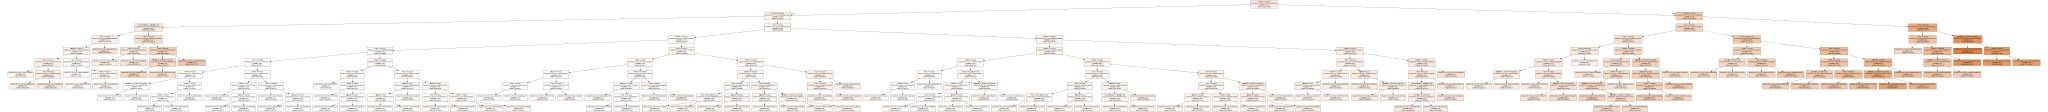

In [ ]:
export_graphviz(tree_final, out_file="tree_depth.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = dt_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,Power,0.746
0,Year,0.175
10,Brand_low,0.032
9,Brand_high,0.015
8,Transmission_Automatic,0.015
1,Kilometers_Driven,0.012
2,Mileage,0.005
4,Location_Urban,0.000
6,Fuel_Type_Diesel,0.000
5,Fuel_Type_CNG,0.000


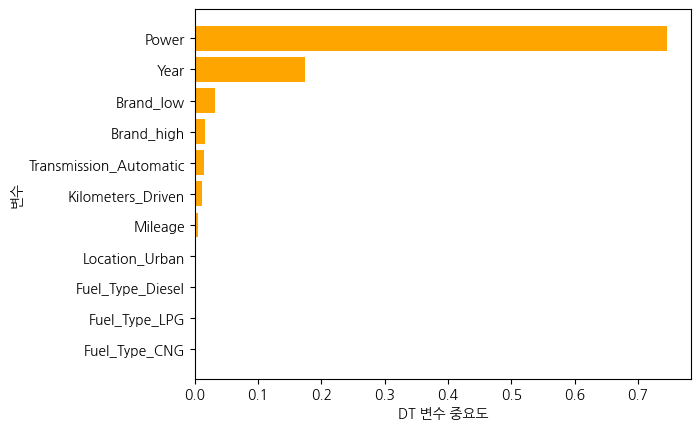

In [ ]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"], color = 'orange')
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("DT 변수 중요도")
plt.ylabel("변수")

plt.show()

### Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

# print(para_n_tree)
for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.967,0.870
1,20,0.971,0.871
2,30,0.974,0.868
3,40,0.977,0.865
4,50,0.975,0.868
5,60,0.975,0.867
6,70,0.978,0.863
7,80,0.977,0.872
8,90,0.977,0.868
9,100,0.977,0.868


In [ ]:
train_score = []; test_score = []

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 30)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 10,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.968,0.847
1,2,0.949,0.873
2,3,0.925,0.864
3,4,0.912,0.866
4,5,0.909,0.877
5,6,0.898,0.870
6,7,0.884,0.861
7,8,0.879,0.865
8,9,0.872,0.863
9,10,0.871,0.865


In [ ]:
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 10, min_samples_leaf = 12,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.859,0.852
1,6,0.864,0.862
2,8,0.869,0.857
3,10,0.865,0.857
4,12,0.864,0.855
5,14,0.870,0.869
6,16,0.865,0.862
7,18,0.862,0.855
8,20,0.869,0.860
9,22,0.865,0.859


In [ ]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 10, min_samples_leaf = 12, min_samples_split = 40,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.539,0.542
1,2,0.680,0.672
2,3,0.784,0.779
3,4,0.822,0.823
4,5,0.838,0.844
5,6,0.845,0.849
6,7,0.851,0.853
7,8,0.855,0.853
8,9,0.854,0.847
9,10,0.855,0.851


In [ ]:
rf_final = RandomForestRegressor(n_estimators = 10, min_samples_leaf = 12,min_samples_split = 40,
                               max_depth = 7)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Random Forest R-squared: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Random Forest R-squared: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

Random Forest R-squared: 0.853
Random Forest R-squared: 0.852



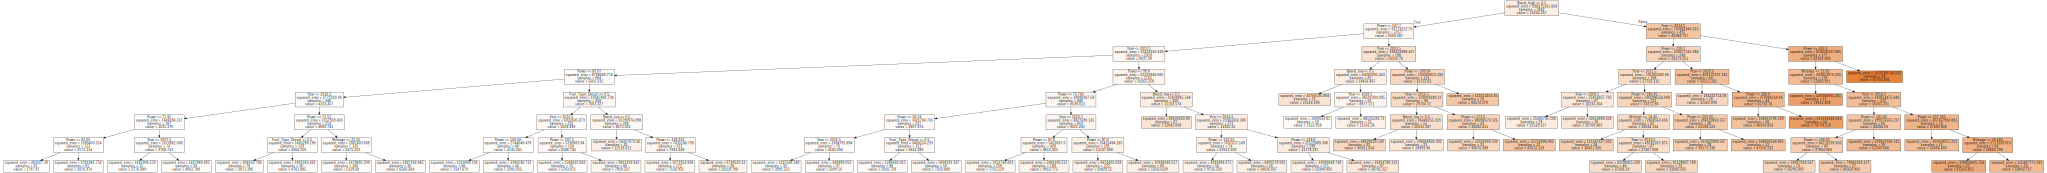

In [ ]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name ,
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,Power,0.544
9,Brand_high,0.256
0,Year,0.163
10,Brand_low,0.016
2,Mileage,0.010
1,Kilometers_Driven,0.007
8,Transmission_Automatic,0.003
4,Location_Urban,0.001
6,Fuel_Type_Diesel,0.000
5,Fuel_Type_CNG,0.000


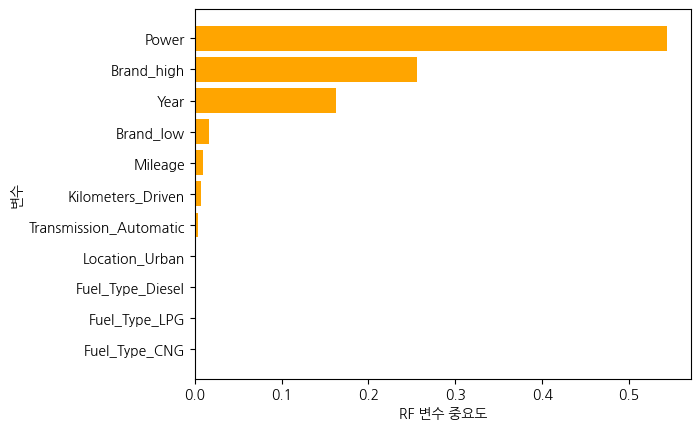

In [ ]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"], color = 'orange')
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("RF 변수 중요도")
plt.ylabel("변수")

plt.show()

### Gradient Boosting

In [ ]:
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.691,0.709
1,20,0.821,0.827
2,30,0.854,0.854
3,40,0.868,0.861
4,50,0.879,0.866
5,60,0.887,0.868
6,70,0.893,0.871
7,80,0.902,0.872
8,90,0.907,0.874
9,100,0.911,0.875


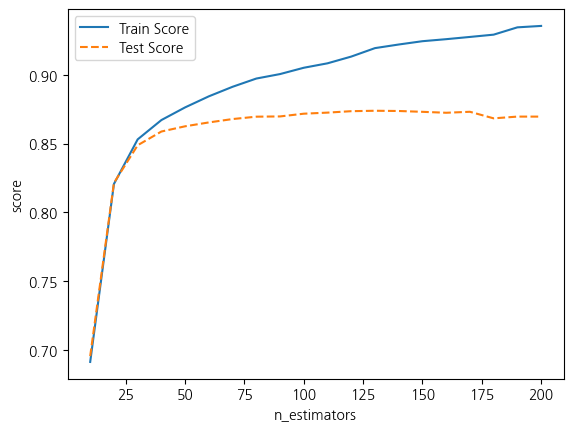

In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

plt.show()

In [ ]:
train_score = []; test_score = []

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 41)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 100,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.911,0.875
1,2,0.902,0.876
2,3,0.898,0.879
3,4,0.898,0.885
4,5,0.894,0.879
5,6,0.895,0.883
6,7,0.896,0.882
7,8,0.898,0.885
8,9,0.894,0.884
9,10,0.888,0.886


In [ ]:
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 40,
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.873,0.878
1,4,0.873,0.878
2,6,0.873,0.878
3,8,0.873,0.878
4,10,0.873,0.878
5,12,0.873,0.878
6,14,0.873,0.878
7,16,0.873,0.878
8,18,0.873,0.878
9,20,0.873,0.878


In [ ]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 40, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.755,0.760
1,2,0.851,0.858
2,3,0.873,0.878
3,4,0.885,0.882
4,5,0.891,0.884
5,6,0.897,0.885
6,7,0.900,0.884
7,8,0.902,0.885
8,9,0.904,0.886
9,10,0.905,0.885


In [ ]:
train_score = []; test_score = []
# learning rate: 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 40, max_depth = 6, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.897,0.885
1,0.2,0.908,0.889
2,0.3,0.922,0.886
3,0.4,0.930,0.883
4,0.5,0.935,0.881
5,0.6,0.939,0.881
6,0.7,0.948,0.877
7,0.8,0.953,0.868
8,0.9,0.958,0.855


In [ ]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 40,
                                     max_depth = 6, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)
# Train 데이터 설명력
print("Gradient Boosting R-squared: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Gradient Boosting R-squared: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Gradient Boosting R-squared: 0.897
Gradient Boosting R-squared: 0.885


In [ ]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,Power,0.554
9,Brand_high,0.195
0,Year,0.161
2,Mileage,0.028
1,Kilometers_Driven,0.027
10,Brand_low,0.022
8,Transmission_Automatic,0.008
6,Fuel_Type_Diesel,0.005
4,Location_Urban,0.001
5,Fuel_Type_CNG,0.000


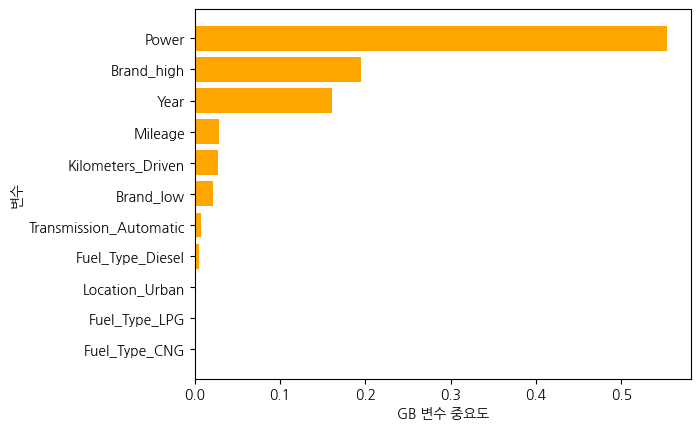

In [ ]:
# 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"], color = 'orange')
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("GB 변수 중요도")
plt.ylabel("변수")
측, 투자 전략 수립
의료 : 의료 데이터 분석, 질병 진단 및 치료, 의료 서비스 개선
제조 : 제조 데이터 분석, 품질 관리, 생산성 향상
물류 : 물류 데이터 분석, 배송 최적화, 재고 관리
유통 : 유통 데이터 분석, 고객 행동 분석, 마케팅 전략 수립
plt.show()

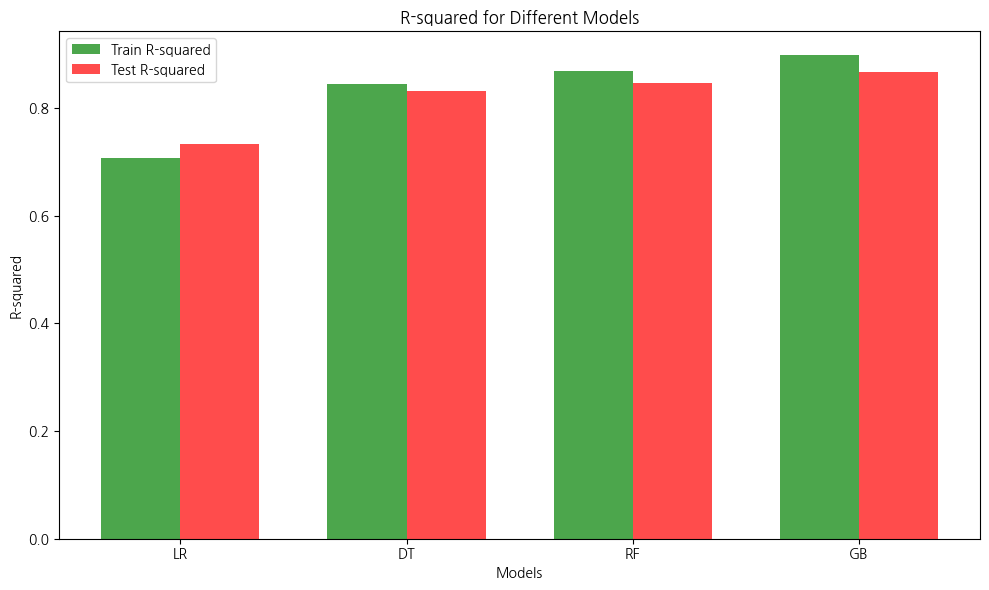

In [ ]:
models = ["LR", "DT", "RF", "GB"]
train_r_squared = [0.707, 0.845, 0.869, 0.898]  # 각 모델의 train R-squared 값
test_r_squared = [0.734, 0.832, 0.847, 0.868]   # 각 모델의 test R-squared 값

# 그래프 설정
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

# Train R-squared 그래프
plt.bar(index, train_r_squared, bar_width, label="Train R-squared", color="green", alpha=0.7)
# Test R-squared 그래프
plt.bar([i + bar_width for i in index], test_r_squared, bar_width, label="Test R-squared", color="red", alpha=0.7)

# 그래프 제목 및 레이블 설정
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("R-squared for Different Models")
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

## 변수 중요도 계산

In [ ]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

# 의사결정나무예측
ri_y_pred = ridge.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, ri_y_pred))
rmse.append(mean_squared_error(df_test_y, ri_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, ri_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, ri_y_pred))

# 의사결정나무예측
dt_y_pred = dt_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

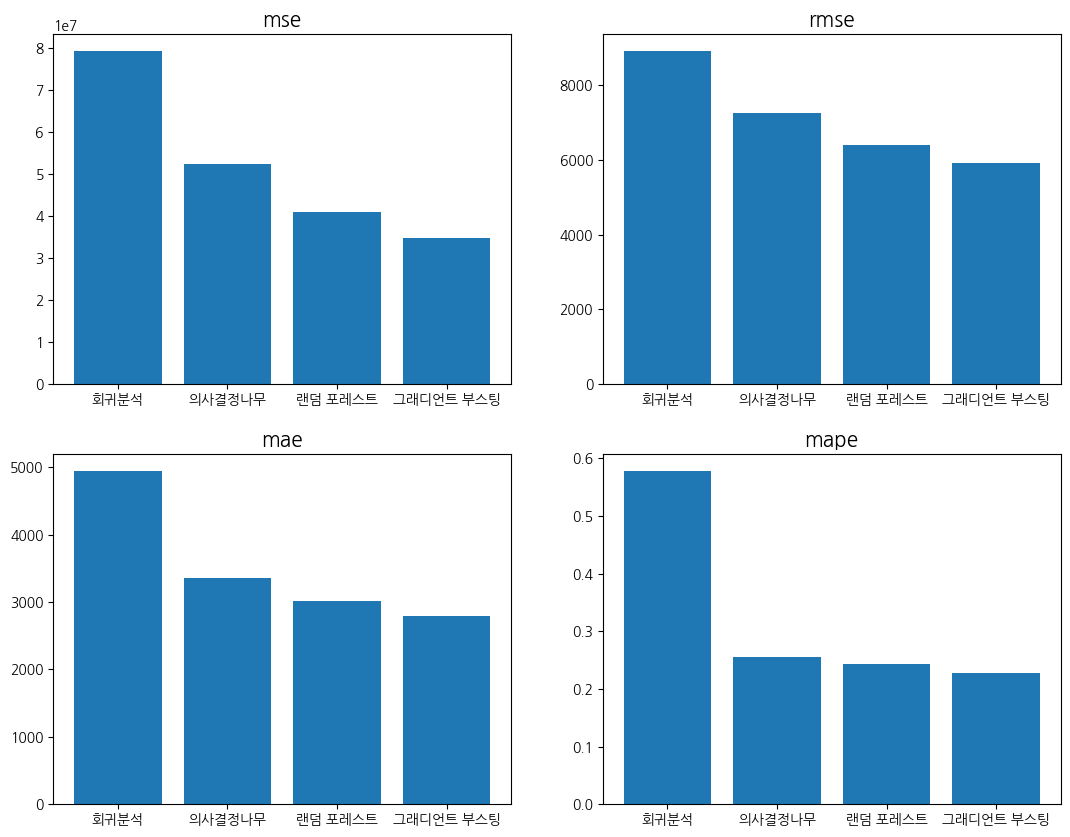

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)
plt.show()